In [1]:
pip install bs4

Note: you may need to restart the kernel to use updated packages.


爬蟲

In [2]:
from bs4 import BeautifulSoup as bs
import json
import requests

In [3]:
def Data(a):
    response = requests.get("https://d.guduodata.com/m/show/detail/"+str(a))
    soup = bs(response.text, "html.parser")
    data_string = soup.text
    data = json.loads(data_string)
    Type.append(data['type'])
    name.append(data['show_name'])
    date.append(data['release_date'])
    
    response = requests.get("https://d.guduodata.com/m/show/audience_analysis/id/"+str(a))
    soup = bs(response.text, "html.parser")
    data_string = soup.text
    data1 = json.loads(data_string)
    male.append(data1['data']['sex']['baidu']['M'])
    female.append(data1['data']['sex']['baidu']['F'])
    age.append(data1['data']['age']['baidu']['first']['rank_desc'])
    age1.append(data1['data']['age']['baidu']['second']['rank_desc'])

    
    response = requests.get("https://d.guduodata.com/m/media/douban_basic/"+str(a))
    soup = bs(response.text, "html.parser")
    data_string = soup.text
    data2 = json.loads(data_string)
    score.append(data2['score'])

裝進list

In [5]:
name = []
Type = []
date = []
male = []
female = []
age = []
age1 = []
score = []

b2019 = [14527,16385,18179,13589,21521,21478,14091,17359,14222,16316,14329,19239,14136,16390,14332,14122,14434,
         16935,13719,16409,14390,17645,21095,17781,21522,17700,21414,14194,14138,14068,13380,13196,4783,15739,
         21040,14180,16352,18306,16133,16363,21041,14640,16403,12931,16972,19057,19267,19063]
for i in range(47):
    Data(b2019[i])

data2019
dataframe含'劇名''題材''日期''男(%)''女(%)''年齡第一多''年齡第二多''豆瓣評分'

In [6]:
import pandas as pd
data2019 = pd.DataFrame({'劇名':name,'題材':Type,'日期':date,'男(%)':male,
                         '女(%)':female,'年齡0':age,'年齡1':age1,'豆瓣評分':score})

In [7]:
data2019['男(%)'] = data2019['男(%)'].str.replace('%', '')
data2019['女(%)'] = data2019['女(%)'].str.replace('%', '')
data2019['年齡0'] = data2019['年齡0'].str.replace('岁', '')
data2019['年齡1'] = data2019['年齡1'].str.replace('岁', '')
data2019['題材'] = data2019['題材'].str.replace('/', '')

In [8]:
data2019

,劇名,題材,日期,男(%),女(%),年齡0,年齡1,豆瓣評分
0,有翡,家庭武侠,2020-12-16,21.27,78.73,25-34,19-24,5.6
1,流金岁月,现代都市情感女性,2020-12-28,27.52,72.48,19-24,25-34,6.4
2,大秦赋,权谋古代,2020-12-01,64.09,35.91,25-34,19-24,5.4
3,狼殿下,古偶武侠,2020-11-19,21.95,78.05,25-34,19-24,6.1
4,终极笔记,现代探险青春,2020-12-10,46.66,53.34,19-24,25-34,8.2
5,装台,现代家庭喜剧,2020-11-29,57.92,42.08,25-34,35-49,8.0
6,大江大河2,年代IP改编都市,2020-12-20,60.47,39.53,25-34,19-24,8.8
7,黑白禁区,现代涉案悬疑,2020-12-16,52.06,47.94,19-24,25-34,4.9
8,隐秘而伟大,年代主旋律抗战,2020-11-06,52.23,47.77,19-24,25-34,8.0
9,琉璃,甜宠爱情,2020-08-06,27.91,72.09,25-34,19-24,7.4


題材與性別

dataframe1
dataframe含'劇名''題材''日期''男(%)''女(%)'

In [9]:
dataframe1 = pd.DataFrame({'劇名':name,'題材':Type,'日期':date,'男(%)':male,'女(%)':female})

In [10]:
dataframe1['男(%)'] = dataframe1['男(%)'].str.replace('%', '')
dataframe1['女(%)'] = dataframe1['女(%)'].str.replace('%', '')
dataframe1['題材'] = dataframe1['題材'].str.replace('/', '')

In [11]:
dataframe1['題材'] = dataframe1['題材'].str.replace('.*女性.*', '女性', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*仙侠.*', '仙侠', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*悬疑.*爱情.*', '悬疑爱情', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*现代.*悬疑.*', '现代悬疑', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*现代.*爱情.*', '現代爱情', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*抗战.*', '抗战', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*古偶.*', '古偶', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*古代.*爱情.*', '古偶', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*年代.*爱情.*', '年代爱情', regex=True)
dataframe1['題材'][46] = '悬疑爱情'
dataframe1['題材'][9] = '仙侠'
dataframe1['題材'][13] = '女性'

In [12]:
dataframe1

,劇名,題材,日期,男(%),女(%)
0,有翡,家庭武侠,2020-12-16,21.27,78.73
1,流金岁月,女性,2020-12-28,27.52,72.48
2,大秦赋,权谋古代,2020-12-01,64.09,35.91
3,狼殿下,古偶,2020-11-19,21.95,78.05
4,终极笔记,现代探险青春,2020-12-10,46.66,53.34
5,装台,现代家庭喜剧,2020-11-29,57.92,42.08
6,大江大河2,年代IP改编都市,2020-12-20,60.47,39.53
7,黑白禁区,现代悬疑,2020-12-16,52.06,47.94
8,隐秘而伟大,抗战,2020-11-06,52.23,47.77
9,琉璃,仙侠,2020-08-06,27.91,72.09


以題材做男女比例對照表格
data_grouped
dataframe含'題材''男(%)''女(%)'

In [13]:
dataframe1['男(%)'] = dataframe1['男(%)'].astype(float)
dataframe1['女(%)'] = dataframe1['女(%)'].astype(float)

In [14]:
data_grouped = dataframe1.groupby('題材')[['男(%)', '女(%)']].mean().reset_index()

In [15]:
data_grouped

,題材,男(%),女(%)
0,仙侠,21.360000,78.640000
1,古偶,17.141667,82.858333
2,喜剧古代,69.640000,30.360000
3,女性,22.282500,77.717500
4,家庭武侠,21.270000,78.730000
5,年代IP改编都市,60.470000,39.530000
6,年代爱情,15.060000,84.940000
7,年代谍战,46.970000,53.030000
8,悬疑爱情,30.665000,69.335000
9,抗战,52.230000,47.770000


以題材做男女比例對照長條圖

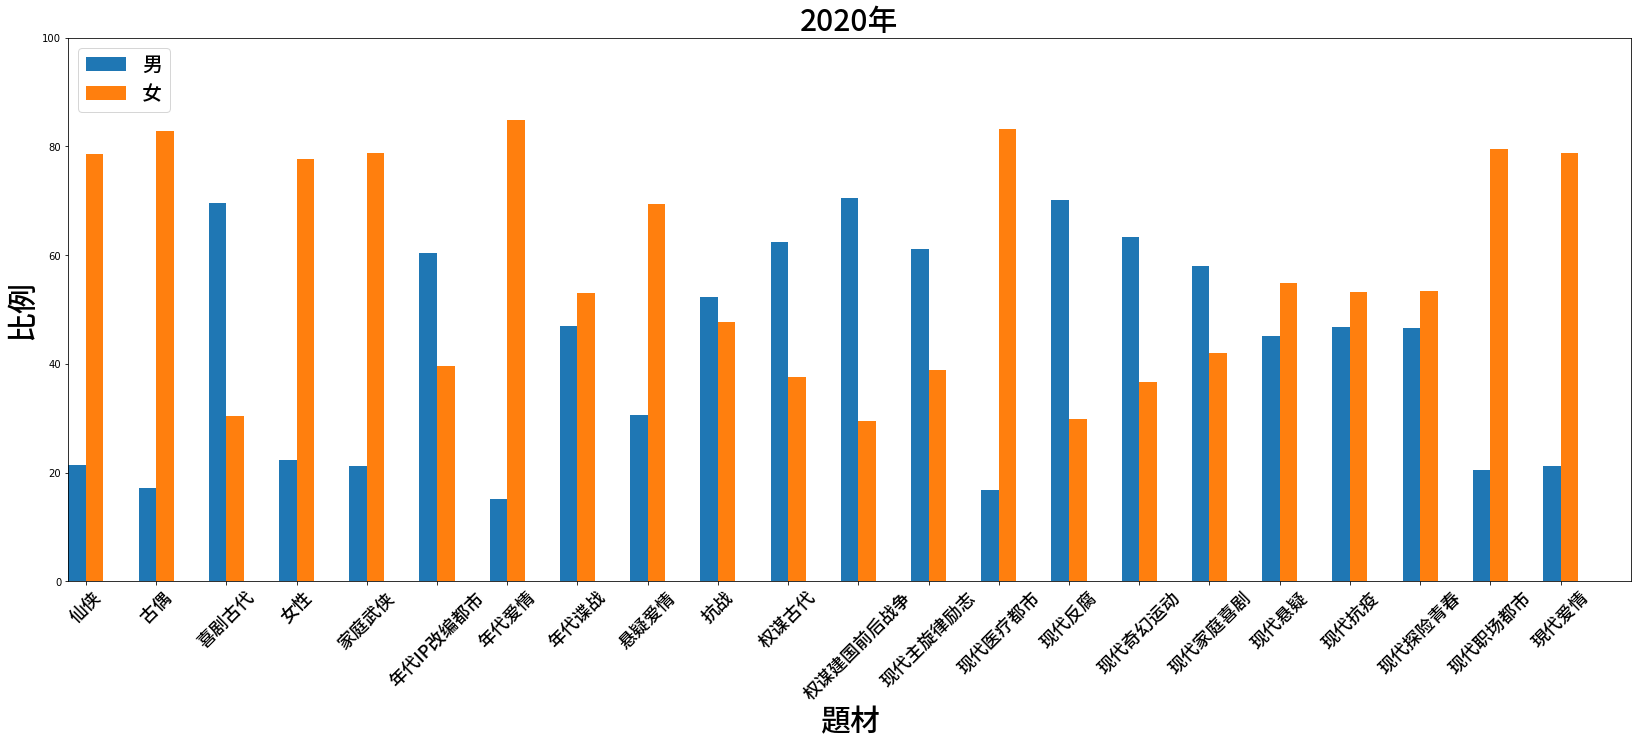

In [31]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

font = FontProperties(fname=r'NotoSansTC-Medium.otf')
font1 = FontProperties(fname=r'NotoSansSC-Medium.otf')

plt.figure(figsize=(28, 10))

# 设置 x 轴类别和偏移量
x = data_grouped['題材']
bar_width = 0.25
index = range(len(x))
offset = bar_width / 2

# 绘制男生的条形图
plt.bar([i - offset for i in index], data_grouped['男(%)'], bar_width, label='男')
plt.xlim(-bar_width, len(x)) 
plt.ylim(0,100) 
# 绘制女生的条形图
plt.bar([i + offset for i in index], data_grouped['女(%)'], bar_width, label='女')

plt.xticks(index, x, fontproperties=font1, fontsize=18, rotation=45)

plt.title('2020年', fontproperties=font, fontsize=30)
plt.xlabel('題材', fontproperties=font, fontsize=30)
plt.ylabel('比例', fontproperties=font, fontsize=30)
plt.legend(loc='upper left', prop=FontProperties(fname=r'NotoSansTC-Medium.otf', size=20))
plt.show()


題材與年齡

dataframe
dataframe含'劇名''題材''日期''集數''年齡第一多''年齡第二多'

In [17]:
dataframe = pd.DataFrame({'劇名':name,'題材':Type,'日期':date,'年齡0':age,'年齡1':age1})
dataframe['題材'] = dataframe['題材'].str.replace('/', '')
dataframe['年齡0'] = dataframe['年齡0'].str.replace('岁', '')
dataframe['年齡1'] = dataframe['年齡1'].str.replace('岁', '')

In [18]:
dataframe['題材'] = dataframe['題材'].str.replace('.*女性.*', '女性', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*仙侠.*', '仙侠', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*悬疑.*爱情.*', '悬疑爱情', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*现代.*悬疑.*', '现代悬疑', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*现代.*爱情.*', '現代爱情', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*抗战.*', '抗战', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*古偶.*', '古偶', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*喜剧.*', '喜剧', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*古代.*爱情.*', '古偶', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*年代.*爱情.*', '年代爱情', regex=True)
dataframe['題材'][46] = '悬疑爱情'
dataframe['題材'][9] = '仙侠'
dataframe['題材'][13] = '女性'

In [19]:
dataframe

,劇名,題材,日期,年齡0,年齡1
0,有翡,家庭武侠,2020-12-16,25-34,19-24
1,流金岁月,女性,2020-12-28,19-24,25-34
2,大秦赋,权谋古代,2020-12-01,25-34,19-24
3,狼殿下,古偶,2020-11-19,25-34,19-24
4,终极笔记,现代探险青春,2020-12-10,19-24,25-34
5,装台,喜剧,2020-11-29,25-34,35-49
6,大江大河2,年代IP改编都市,2020-12-20,25-34,19-24
7,黑白禁区,现代悬疑,2020-12-16,19-24,25-34
8,隐秘而伟大,抗战,2020-11-06,19-24,25-34
9,琉璃,仙侠,2020-08-06,25-34,19-24


In [20]:
# 计算不同年龄段的数量
count_grouped = dataframe.groupby(['題材', '年齡0']).size().unstack().reset_index()

# 补零处理
age_groups = ['19-24', '25-34']
for age_group in age_groups:
    if age_group not in count_grouped.columns:
        count_grouped[age_group] = 0
    count_grouped[age_group].fillna(0, inplace=True)

In [21]:
count_grouped['19-24'] = count_grouped['19-24'].astype(float)
count_grouped['25-34'] = count_grouped['25-34'].astype(float)
count_grouped['19-24'] = count_grouped['19-24'] + 3
count_grouped['25-34'] = count_grouped['25-34'] + 3

In [22]:
count_grouped

年齡0,題材,19-24,25-34
0,仙侠,3.0,5.0
1,古偶,6.0,6.0
2,喜剧,4.0,4.0
3,女性,7.0,3.0
4,家庭武侠,3.0,4.0
5,年代IP改编都市,3.0,4.0
6,年代爱情,4.0,3.0
7,年代谍战,4.0,3.0
8,悬疑爱情,5.0,3.0
9,抗战,4.0,3.0


以題材做年齡(19-24/25-34)比例對照長條圖

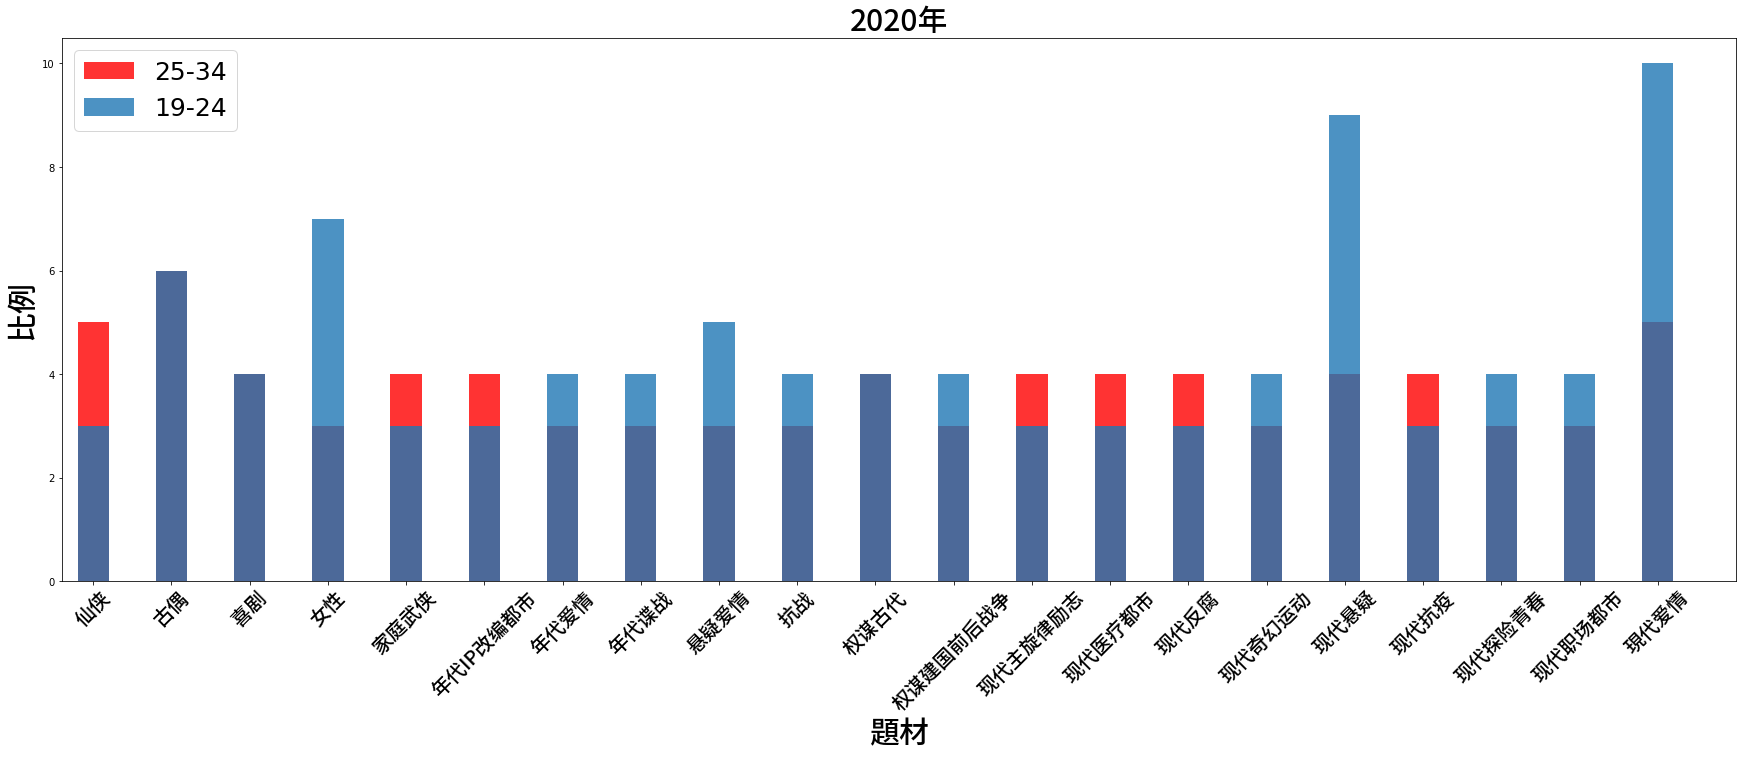

In [30]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

font = FontProperties(fname=r'NotoSansTC-Medium.otf')
font1 = FontProperties(fname=r'NotoSansSC-Medium.otf')

plt.figure(figsize=(30, 10))

# 设置 x 轴类别
x = count_grouped['題材']

# 设置两个柱子的位置
bar_width = 0.4
index = range(len(x))


plt.bar(index, count_grouped['25-34'], bar_width, label='25-34',color='red',alpha = 0.8)
plt.bar(index, count_grouped['19-24'], bar_width, label='19-24',alpha = 0.8)

plt.xlim(-bar_width, len(x))  # 将x轴范围向左偏移一个柱子的宽度

plt.xticks([i for i in index], x, fontproperties=font1, ha='center', fontsize=20, rotation=45)

plt.title('2020年', fontproperties=font, fontsize=30)
plt.xlabel('題材', fontproperties=font, fontsize=30)
plt.ylabel('比例', fontproperties=font, fontsize=30)
plt.legend(loc='upper left', prop={'size': 25})
plt.show()


題材與評分

In [24]:
def Data1(a):
    response = requests.get("https://d.guduodata.com/m/show/detail/"+str(a))
    soup = bs(response.text, "html.parser")
    data_string = soup.text
    data4 = json.loads(data_string)
    Type1.append(data4['type'])
    Name.append(data4['show_name'])
    Date.append(data4['release_date'])
    
    response = requests.get("https://d.guduodata.com/m/media/douban_basic/"+str(a))
    soup = bs(response.text, "html.parser")
    data_string = soup.text
    data3 = json.loads(data_string)
    Score.append(data3['score'])

In [25]:
Name = []
Type1 = []
Date = []
Score = []
a2019 = [14091,19267,16348,21609,21436,19338,15649,21074,21271,21095,21355,14136,21478,19009,17004,19557,14222,17368,
        17805,20440,13611,16393,14433,14316,4783]

a2019_set = set(a2019)
b2019_set = set(b2019)
union_set = a2019_set.union(b2019_set)
union_list = list(union_set)
for i in range(66):
    Data1(union_list[i])

In [26]:
import pandas as pd
Data2019 = pd.DataFrame({'劇名':Name,'題材':Type1,'日期':Date,'豆瓣評分':Score})
Data2019['題材'] = Data2019['題材'].str.replace('/', '')
Data2019

,劇名,題材,日期,豆瓣評分
0,流金岁月,现代都市情感女性,2020-12-28,6.4
1,大秦赋,权谋古代,2020-12-01,5.4
2,使徒行者3,现代涉案悬疑港台,2020-10-12,6.3
3,了不起的女孩,现代,2020-12-21,6.5
4,摩天大楼,现代悬疑涉案,2020-08-19,7.9
...,...,...,...,...
61,怪你过分美丽,现代女性都市,2020-06-08,7.7
62,小风暴之时间的玫瑰,现代都市情感爱情,2020-12-02,5.5
63,新世界,权谋建国前后战争,2020-01-13,5.5
64,如意芳霏,古偶爱情,2020-10-21,4.7


In [27]:
Data2019['題材'] = Data2019['題材'].str.replace('.*女性.*', '女性', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*仙侠.*', '仙侠', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*悬疑.*爱情.*', '悬疑爱情', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*现代.*悬疑.*', '现代悬疑', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*现代.*爱情.*', '現代爱情', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*喜剧.*', '喜剧', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*抗战.*', '抗战', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*古偶.*', '古偶', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*权谋.*', '权谋', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*古代.*爱情.*', '古偶', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*年代.*爱情.*', '年代爱情', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*现代.*都市.*', '现代都市', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*现代.*青春.*', '现代青春', regex=True)
Data2019['題材'][25] = '悬疑爱情'
Data2019['題材'][52] = '仙侠'
Data2019['題材'][3] = '女性'
Data2019

C:\Users\User\AppData\Local\Temp\ipykernel_18556\1086176943.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data2019['題材'][25] = '悬疑爱情'
C:\Users\User\AppData\Local\Temp\ipykernel_18556\1086176943.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data2019['題材'][52] = '仙侠'
C:\Users\User\AppData\Local\Temp\ipykernel_18556\1086176943.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data2019['題材'][3] = '女性'


,劇名,題材,日期,豆瓣評分
0,流金岁月,女性,2020-12-28,6.4
1,大秦赋,权谋,2020-12-01,5.4
2,使徒行者3,现代悬疑,2020-10-12,6.3
3,了不起的女孩,女性,2020-12-21,6.5
4,摩天大楼,现代悬疑,2020-08-19,7.9
...,...,...,...,...
61,怪你过分美丽,女性,2020-06-08,7.7
62,小风暴之时间的玫瑰,現代爱情,2020-12-02,5.5
63,新世界,权谋,2020-01-13,5.5
64,如意芳霏,古偶,2020-10-21,4.7


In [28]:
Data2019['豆瓣評分'] = Data2019['豆瓣評分'].astype(float)
data_grouped2 = Data2019.groupby('題材')['豆瓣評分'].mean().reset_index()
data_grouped2

,題材,豆瓣評分
0,仙侠,7.100000
1,古代悬疑推理动作,7.800000
2,古偶,6.344444
3,喜剧,7.375000
4,女性,6.900000
5,家庭武侠,5.600000
6,年代IP改编都市,8.800000
7,年代爱情,3.100000
8,年代谍战,7.900000
9,悬疑爱情,7.600000


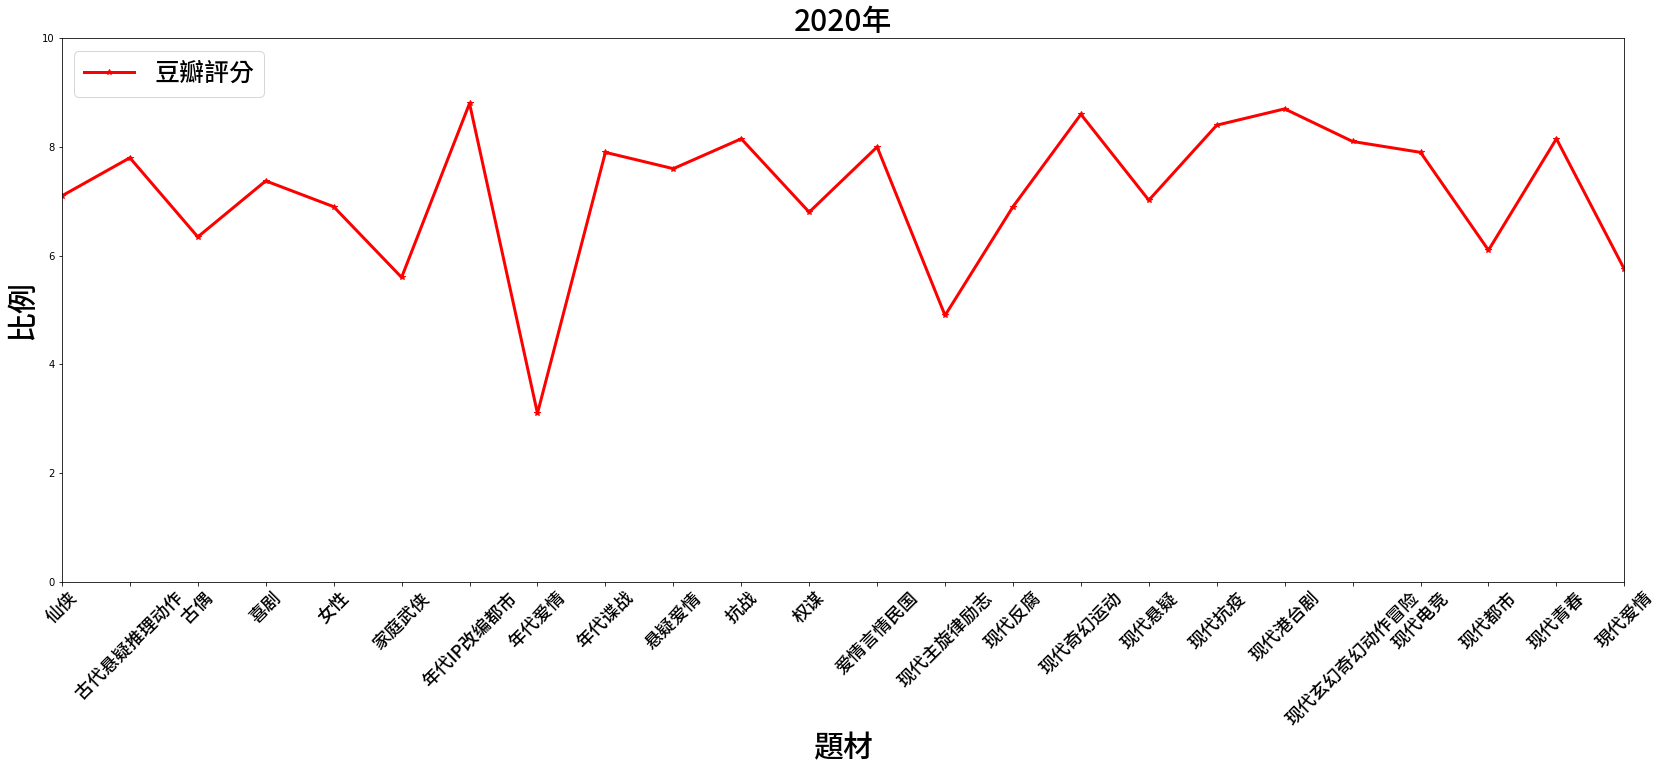

In [34]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

font = FontProperties(fname=r'NotoSansTC-Medium.otf')
font1 = FontProperties(fname=r'NotoSansSC-Medium.otf')

plt.figure(figsize=(28, 10))

# 设置 x 轴类别
x = data_grouped2['題材']

index = range(len(x))

plt.plot(index, data_grouped2['豆瓣評分'], marker='*', c='r', label='豆瓣評分', linewidth=3)

plt.xlim(0, len(x) - 1)
plt.ylim(0, 10)# 調整x軸範圍，從最左側的數據點開始
plt.xticks(index, x, fontproperties=font1, ha='center', fontsize=18, rotation=45)

plt.title('2020年', fontproperties=font, fontsize=30)
plt.xlabel('題材', fontproperties=font, fontsize=30)
plt.ylabel('比例', fontproperties=font, fontsize=30)
plt.legend(loc='upper left', prop=FontProperties(fname=r'NotoSansTC-Medium.otf', size=25), fontsize=50)
plt.show()
